# Assignment 1 - Machine Learning

#### Names...

Setting up the data and importing most important packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
red_data = pd.read_csv("winequality-red.csv", sep=";")
white_data = pd.read_csv("winequality-white.csv", sep=";")


In [3]:
red_data.sample(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
980,9.1,0.50,0.30,1.90,0.065,8.0,17.0,0.99774,3.32,0.71,10.5,6
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,5
327,10.3,0.44,0.50,4.50,0.107,5.0,13.0,0.99800,3.28,0.83,11.5,5
1307,6.8,0.68,0.09,3.90,0.068,15.0,29.0,0.99524,3.41,0.52,11.1,4
1222,8.1,0.53,0.22,2.20,0.078,33.0,89.0,0.99678,3.26,0.46,9.6,6
661,7.5,0.42,0.31,1.60,0.080,15.0,42.0,0.99780,3.31,0.64,9.0,5
635,8.7,0.84,0.00,1.40,0.065,24.0,33.0,0.99540,3.27,0.55,9.7,5
986,9.8,0.34,0.39,1.40,0.066,3.0,7.0,0.99470,3.19,0.55,11.4,7
1355,6.1,0.32,0.25,1.80,0.086,5.0,32.0,0.99464,3.36,0.44,10.1,5
1048,9.3,0.49,0.36,1.70,0.081,3.0,14.0,0.99702,3.27,0.78,10.9,6


# 1

## 1.1


In [4]:
# Fix for correct dtypes for some columns
columns_dtype_change = ["free sulfur dioxide", "total sulfur dioxide"]

red_data[columns_dtype_change] = red_data[columns_dtype_change].astype(int)
white_data[columns_dtype_change] = white_data[columns_dtype_change].astype(int)


## 1.2


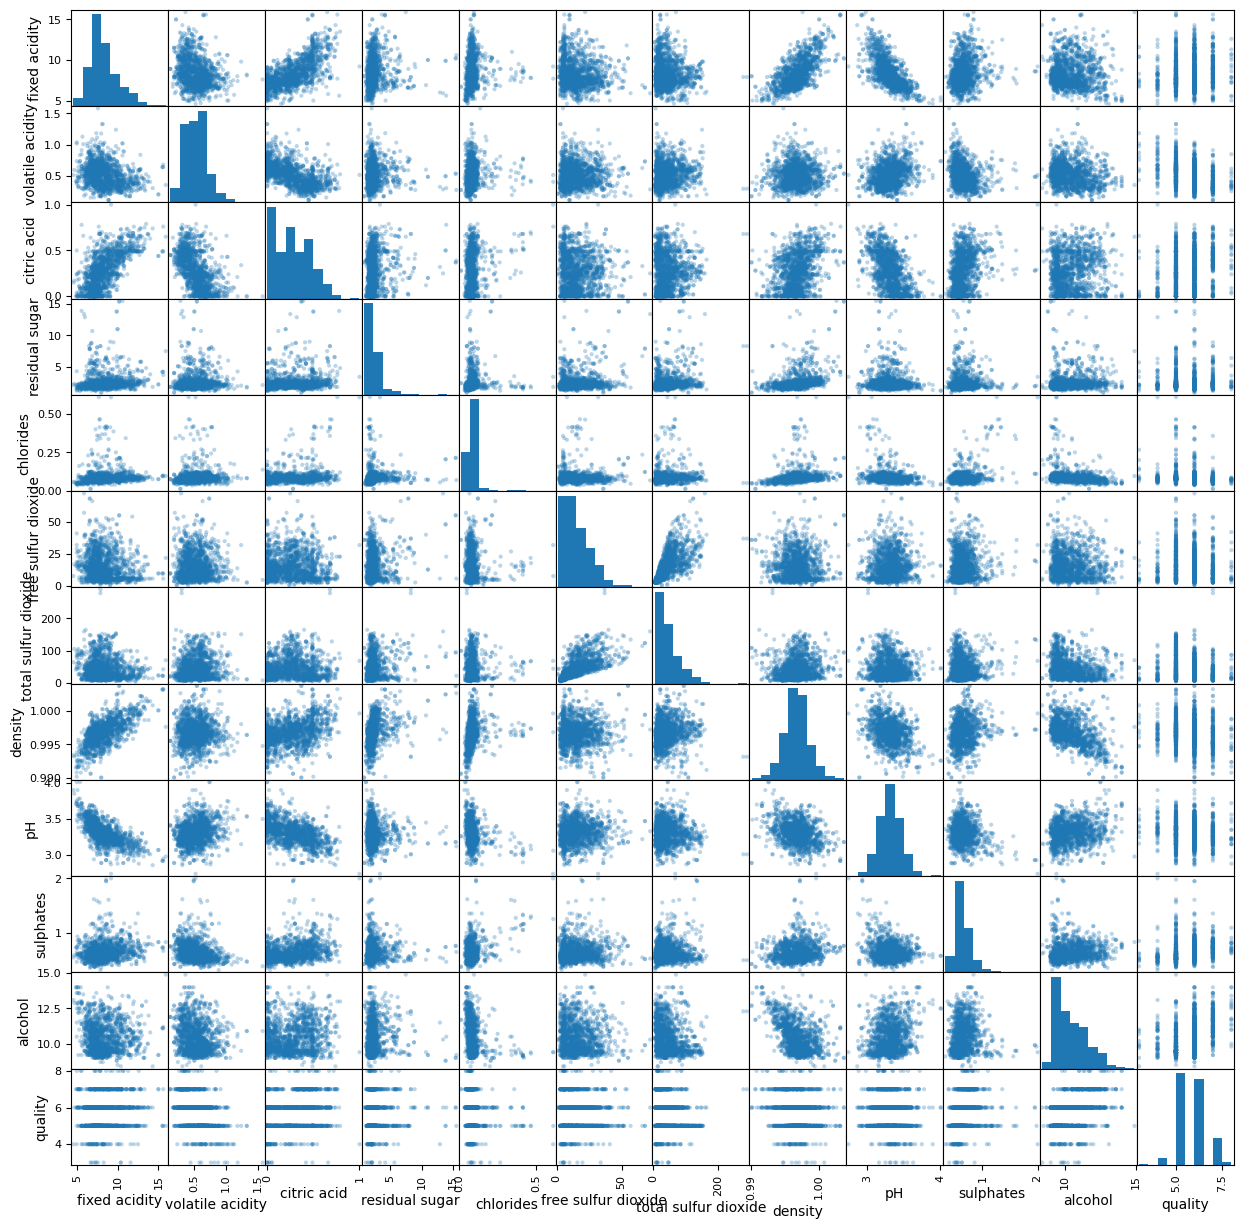

In [5]:
_ = pd.plotting.scatter_matrix(red_data, figsize=(15, 15), alpha=0.3)


[Text(0.5, 1.0, '(absolute) Correlation Matrix Red Wine')]

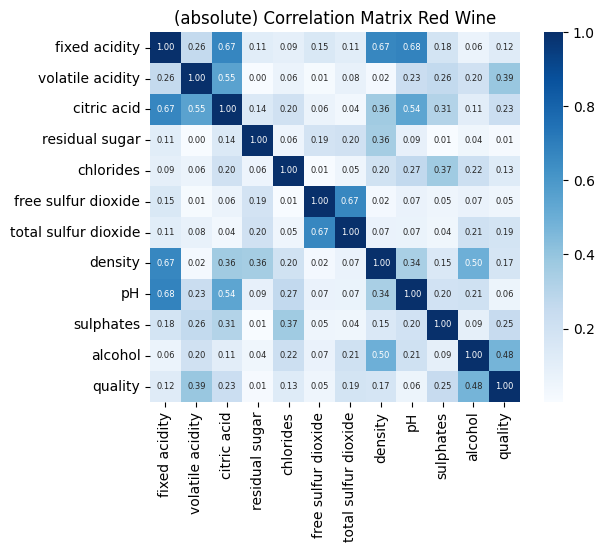

In [6]:
# For our purposes we use the absolute value of the correlation matrix.
# Because we do not care of the direction of correlation, but rather the strength.
corr_red = abs(red_data.corr())
sb.heatmap(
    corr_red,
    cmap="Blues",
    square=True,
    annot=True,
    annot_kws={"fontsize": 6},
    fmt=".2f",
).set(title="(absolute) Correlation Matrix Red Wine")


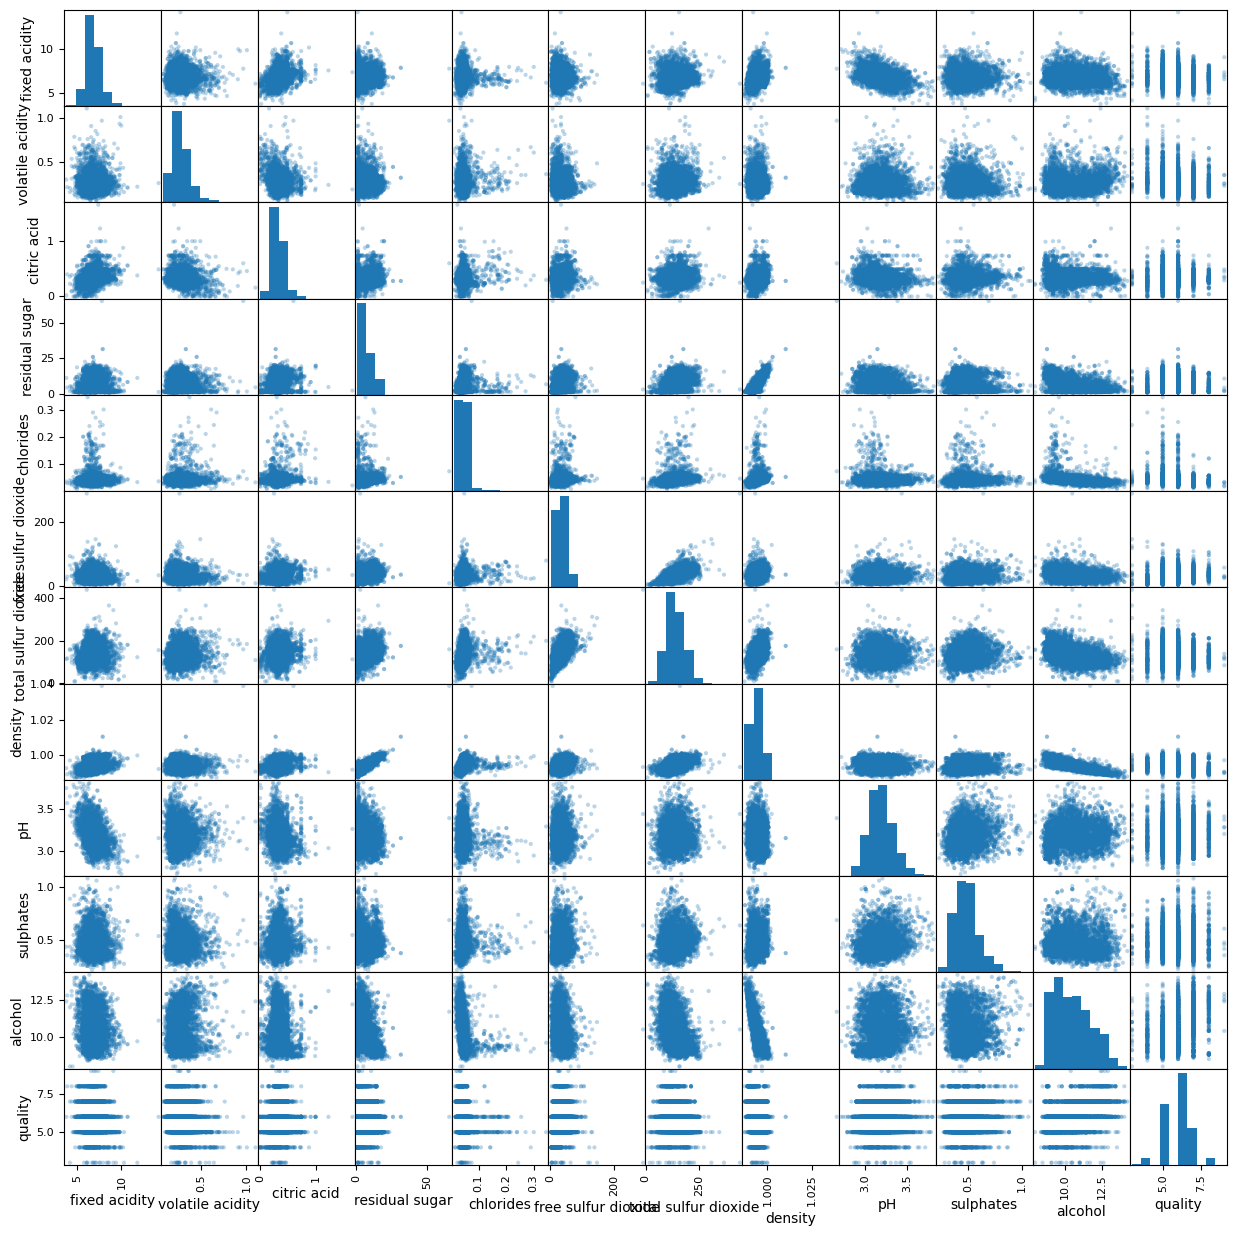

In [7]:
_ = pd.plotting.scatter_matrix(white_data, figsize=(15, 15), alpha=0.3)


[Text(0.5, 1.0, '(absolute) Correlation Matrix White Wine')]

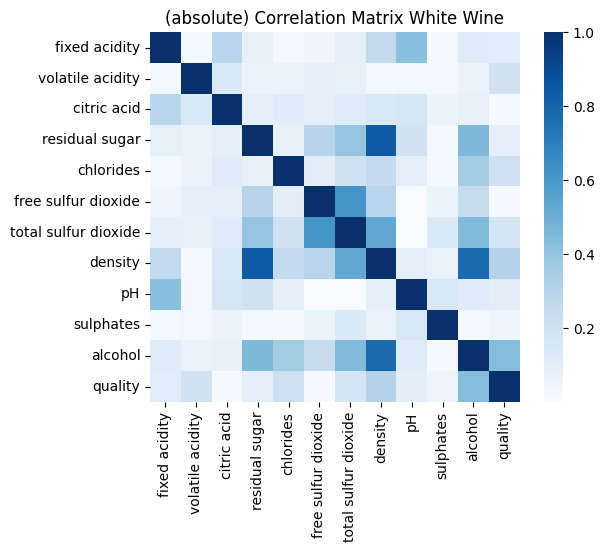

In [8]:
corr_white = abs(white_data.corr())
sb.heatmap(corr_white, cmap="Blues", square=True).set(title="(absolute) Correlation Matrix White Wine")


# 2

## 2.1, 2.2, 2.3


In [9]:
# 2.1
from sklearn.datasets import make_regression

X_reg, y_reg, coeffs = make_regression(coef=True, random_state=2)

# 2.2
beta_ols = np.linalg.inv(X_reg.T @ X_reg) @ X_reg.T @ y_reg


In [10]:
# 2.3
# How many coefficents differ by more than 0.0000000001 units by using ordinary least square method.
abs(np.isclose(beta_ols, coeffs, atol=1e-10).sum() - len(beta_ols))


0

# 3

## 3.1, 3.2



In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from typing import Tuple, Union

ModelRegressor = Union[LinearRegression, Ridge, Lasso, ElasticNet]


def get_all_scores(pred: np.array, y_true: np.array, model_name: str) -> None:
    """Prints a nicely formatted table with loss from the model predictions."""
    mae = mean_absolute_error(y_true, pred)
    msq = mean_squared_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"{model_name:^27}")
    print("*" * 27)
    print(f"{'Method':<19}| Result")
    print("—" * 27)
    print(f"{'R^2':<19}| {r2:.4f}")
    print(f"{'Mean Absolute Error':<19}| {mae:.4f}")
    print(f"{'Mean Squared Error':<19}| {msq:.4f}")


def fit_and_test_model(
    model: ModelRegressor,
    X_train_data: np.array,
    X_test_data: np.array,
    y_train_data: np.array,
    y_test_data: np.array,
    print_result: bool = False,
    model_name: str = "",
) -> Tuple[ModelRegressor, np.array]:
    model.fit(X_train_data, y_train_data)
    pred = model.predict(X_test_data)
    if print_result:
        get_all_scores(pred=pred, y_true=y_test_data, model_name=model_name)
    return model, pred


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Get the data X_w, y_w <=> white wine dataset and X_r, y_r <=> red wine dataset
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(
    white_data.drop(["quality"], axis=1), white_data["quality"], random_state=100
)
white_data_dictionary = {
    "X_train_data": X_w_train,
    "X_test_data": X_w_test,
    "y_train_data": y_w_train,
    "y_test_data": y_w_test,
}

X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(
    red_data.drop(["quality"], axis=1), red_data["quality"], random_state=100
)
red_data_dictionary = {
    "X_train_data": X_r_train,
    "X_test_data": X_r_test,
    "y_train_data": y_r_train,
    "y_test_data": y_r_test,
}


In [13]:
def do_exercise(type_of_wine: str = "white"):
    if type_of_wine.startswith(("w", "W")):
        data_to_use = white_data_dictionary
        wine_type = "White"
    elif type_of_wine.startswith(("r", "R")):
        data_to_use = red_data_dictionary
        wine_type = "Red"
    else:
        raise ValueError

    figure, axis = plt.subplots(2, 2)

    # Ordinary Least Square
    lr = LinearRegression(n_jobs=-1)
    fit_and_test_model(
        lr, print_result=True, model_name="Ordinary Least-Squares", **data_to_use
    )

    # Ridge grid search for interval alpha in [0.0001, 100]
    parameter = {"alpha": np.logspace(-4, 2, num=100)}
    ridge_grid = GridSearchCV(
        Ridge(), param_grid=parameter, return_train_score=True, n_jobs=-1
    )
    ridge_grid.fit(data_to_use["X_train_data"], data_to_use["y_train_data"])
    ridge = Ridge(**ridge_grid.best_params_)
    fit_and_test_model(
        ridge,
        print_result=True,
        model_name=f"Ridge - alpha={ridge_grid.best_params_['alpha']:.4f}",
        **data_to_use,
    )
    _ = pd.DataFrame(ridge_grid.cv_results_).plot(
        x="param_alpha",
        y=["mean_test_score", "mean_train_score"],
        logx=True,
        ax=axis[0, 0],
    )
    axis[0, 0].set_title("Ridge Score w.r.t alpha")

    # Lasso grid serach with same interval as ridge
    lasso_grid = GridSearchCV(
        Lasso(), param_grid=parameter, return_train_score=True, n_jobs=-1
    )
    lasso_grid.fit(data_to_use["X_train_data"], data_to_use["y_train_data"])
    lasso = Lasso(**lasso_grid.best_params_)
    fit_and_test_model(
        lasso,
        print_result=True,
        model_name=f"Lasso - alpha={lasso_grid.best_params_['alpha']:.4f}",
        **data_to_use,
    )
    _ = pd.DataFrame(lasso_grid.cv_results_).plot(
        x="param_alpha",
        y=["mean_test_score", "mean_train_score"],
        logx=True,
        ax=axis[0, 1],
    )
    axis[0, 1].set_title("Lasso Scores w.r.t. alpha")

    # Elastic Net grid search with same alpha, and l1_ration in interval [0,1]
    parameter["l1_ratio"] = np.linspace(1e-5, 1, num=25)
    elastic_grid = GridSearchCV(
        ElasticNet(), param_grid=parameter, return_train_score=True, n_jobs=-1
    )
    elastic_grid.fit(data_to_use["X_train_data"], data_to_use["y_train_data"])
    elastic = ElasticNet(**elastic_grid.best_params_)
    fit_and_test_model(
        elastic,
        print_result=True,
        model_name=f"ElasticNet - alpha={elastic_grid.best_params_['alpha']:.4f} - l1_ratio={elastic_grid.best_params_['l1_ratio']:.4f}",
        **data_to_use,
    )
    grid_results = pd.DataFrame(elastic_grid.cv_results_)[
        ["param_alpha", "param_l1_ratio", "mean_test_score", "mean_train_score"]
    ].to_numpy()

    # Normal line plot will not work with two variables, we will use contour plot
    countor = axis[1, 0].tricontour(
        grid_results[:, 0].astype(float),
        grid_results[:, 1].astype(float),
        grid_results[:, 2].astype(float),
        levels=300,
        cmap="Greens",
    )
    axis[1, 0].set_xscale("log")
    # axis[1, 0].set_yscale("log")
    axis[1, 0].set_title("ElasticNet Score Contour Plot of Test Score")
    figure.colorbar(countor)
    countor = axis[1, 1].tricontour(
        grid_results[:, 0].astype(float),
        grid_results[:, 1].astype(float),
        grid_results[:, 3].astype(float),
        levels=300,
        cmap="Greens",
    )
    axis[1, 1].set_xscale("log")
    # axis[1,1].set_yscale('log')
    axis[1, 1].set_title("ElasticNet Score Contour Plot of Train Score")
    figure.colorbar(countor)
    axis[1, 0].set_xlabel("param alpha")
    axis[1, 1].set_xlabel("param alpha")
    axis[1, 0].set_ylabel("param l1_ratio")
    axis[1, 1].set_ylabel("param l1_ratio")
    figure.set_size_inches(20, 10)
    figure.suptitle(f"Grid Search Curves for {wine_type} wine dataset", fontsize=20)

  Ordinary Least-Squares   
***************************
Method             | Result
———————————————————————————
R^2                | 0.3293
Mean Absolute Error| 0.5001
Mean Squared Error | 0.4237
   Ridge - alpha=0.8697    
***************************
Method             | Result
———————————————————————————
R^2                | 0.3254
Mean Absolute Error| 0.5009
Mean Squared Error | 0.4262
   Lasso - alpha=0.0005    
***************************
Method             | Result
———————————————————————————
R^2                | 0.3260
Mean Absolute Error| 0.5006
Mean Squared Error | 0.4258
ElasticNet - alpha=0.0009 - l1_ratio=0.0000
***************************
Method             | Result
———————————————————————————
R^2                | 0.3245
Mean Absolute Error| 0.5013
Mean Squared Error | 0.4268


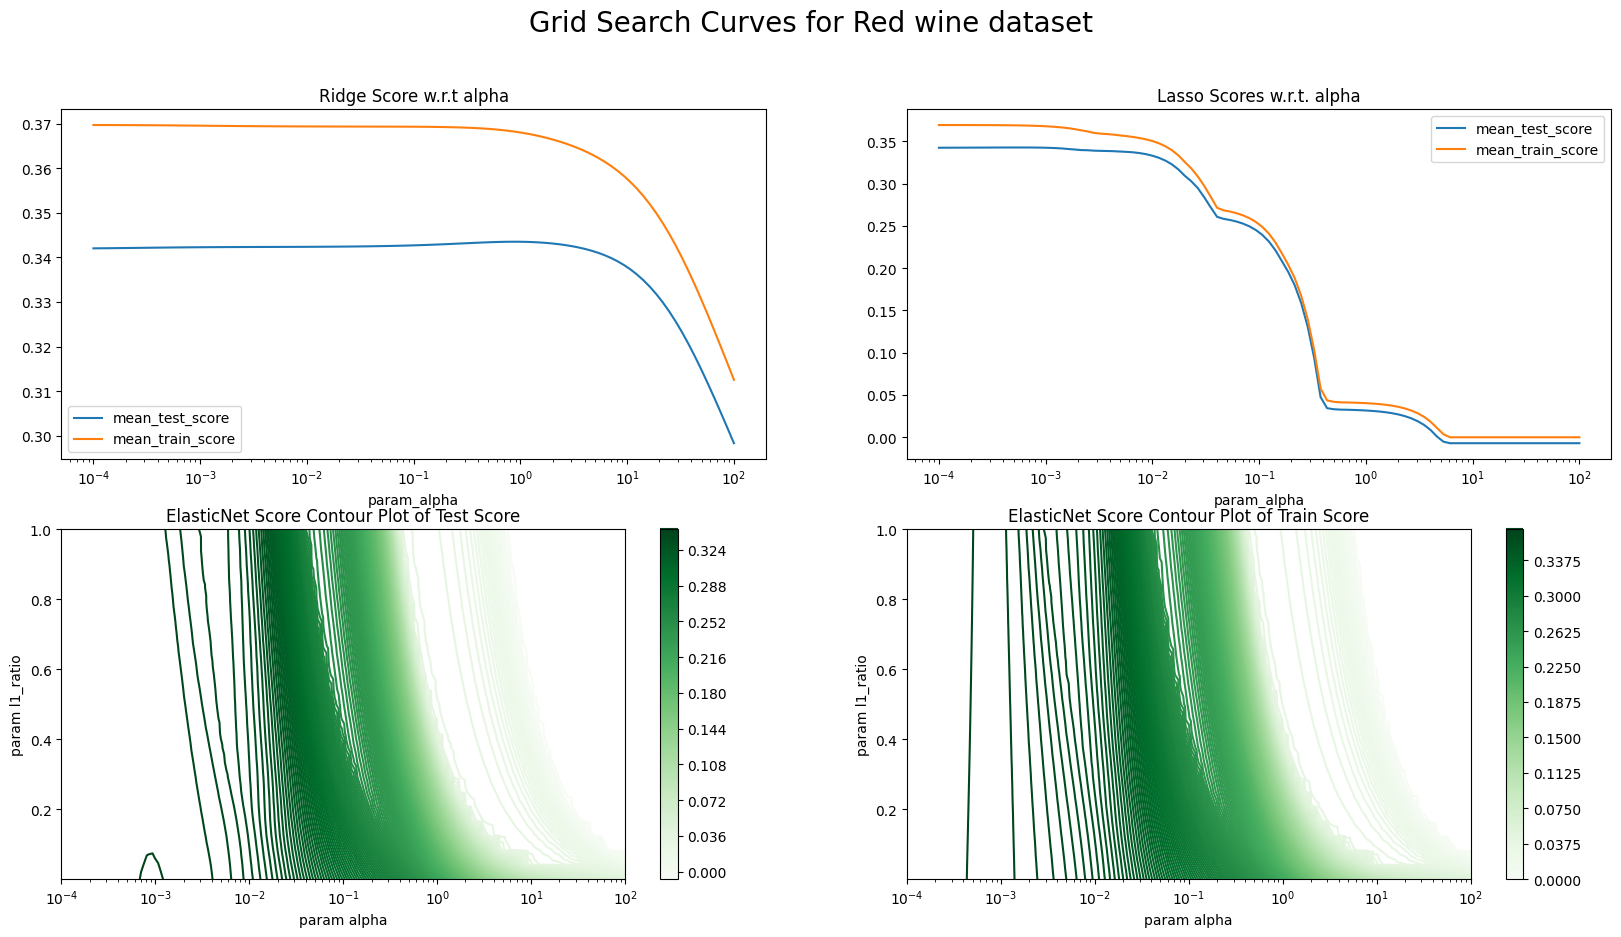

In [14]:
do_exercise("red")


## Analysis Red Wine Dataset
Looking at the initial results for the optimal hyperparameter(s) found via grid search it is clear that no improvement is made for adding regularisation. Looking at the Ridge score (L2 regularisation) curve there is a "bump" around $\alpha \approx 1$, which can be seen in the results, where the optimal $\alpha = 0.8697$ is displayed. As $\alpha$ increases it can be noted that the spread between the test and train score decreases. This implies that it does less overfitting, however, it should also be noted that the overall score decreases as well. Showing that the model performs rather badly for those values. Further, it should be considered that there is almost no difference in test scores, especially in the interval $\alpha\in[10^{-1},10]$.

Taking a look at the Lasso score (L1 regularisation) curve a similar picture arises. Although the model performance is much worse when $\alpha > 10^{-2}$, and consistently decreases for larger $\alpha$. Looking at this curve it can, as the results also show, be concluded that $\alpha < 10^{-3}$. It appears that also here regularisation does not help increase test scores. For example compare $R^2$ results from OLS $0.3293$ and Lasso $0.3260$

Lastly, the ElasticNet score (L1 and L2 regularisation) contour plot shows how the two hyperparameters `l1_ratio` and $\alpha$ affect the test/train score. It clearly looks like $\alpha$ is the most important hyperparameter for this dataset, given that the contours are principally vertical. There is, just as for L1 and L2 separate regularisation a tendency to choose very small $\alpha$. The largest improvement in test and train score is found in the interval $\alpha \in (10^{-2},1]$ as the contours are the closest in this interval. Indeed it shows in the result that a low `l1_ratio` and $\alpha$ gives the best score.

In conclusion, it should be mentioned that the best-performing model is still OLS. Although the difference is, not surprisingly, small, since $\alpha$ is small in all the models, and thus almost no regularisation takes place.

  Ordinary Least-Squares   
***************************
Method             | Result
———————————————————————————
R^2                | 0.2539
Mean Absolute Error| 0.5807
Mean Squared Error | 0.5755
   Ridge - alpha=0.0005    
***************************
Method             | Result
———————————————————————————
R^2                | 0.2540
Mean Absolute Error| 0.5804
Mean Squared Error | 0.5755
   Lasso - alpha=0.0001    
***************************
Method             | Result
———————————————————————————
R^2                | 0.2488
Mean Absolute Error| 0.5826
Mean Squared Error | 0.5795
ElasticNet - alpha=0.0001 - l1_ratio=0.0000
***************************
Method             | Result
———————————————————————————
R^2                | 0.2487
Mean Absolute Error| 0.5826
Mean Squared Error | 0.5796


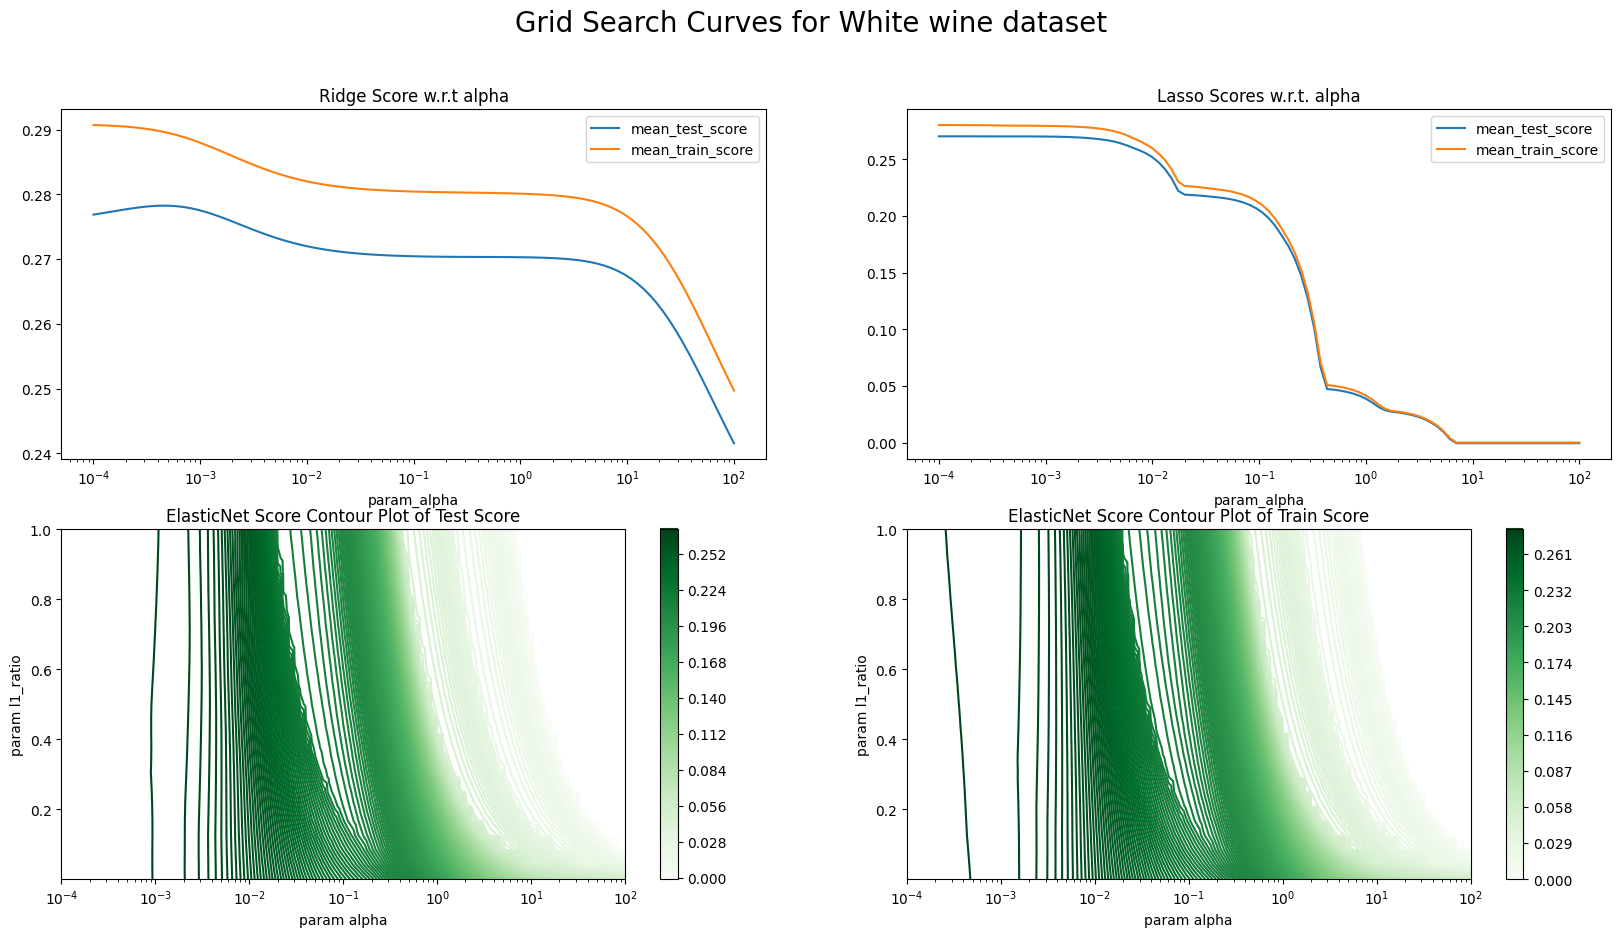

In [15]:
do_exercise("white")

## Analysis White Wine Dataset
For this dataset, the best performing one is the one with L2 regularisation. However, the difference is negligible (or the same) and most likely due to random luck. In other words, regularisation does, as was the case for the red dataset, very little to improve performance. 

This dataset does show a different Ridge score curve compared to the red wine dataset. It appears that the regularisation is weakening the model even earlier. Nonetheless, the real drop-off point is still when $\alpha \approx 10$. The Lasso score curve exhibits a similar form as it did on the red wine dataset.

The major difference, except for the lower score on the white dataset, is the ElasticNet score plots. Looking at the bottom of the graph, it appears that the contours are somewhat tilted. A similar phenomenon existed on the white dataset but was not as apparent. This behavior of the plot indicates that for the same `l1_ratio` a different alpha is better. It is the most obvious for a low `l1_ratio` i.e $<0.2$. This is most likely because of the result we saw with the L2 regularisation having its optimum $\alpha$ a bit away from $0$.